### Print out all dataset.csv

In [1]:
import os
import numpy as np 
import pandas as pd 

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if 'csv' in filename:
            print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv
/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/fifa-2018-match-statistics/FIFA 2018 Statistics.csv


### Exercise 1. Classification-model
### 1.1. Thực hiện xử lý số liệu cơ bản trong file `creditcard.csv`, 

[link](https://www.kaggle.com/mlg-ulb/creditcardfraud).

Dữ liệu này đươc thu thập với mục đích giám định một `phiên giao dịch` (`transaction`) nào đó của khách hàng có bị `gian lận` (`fraudulent`) khoản tiền ở một `mặt hàng` (`items`) nào đó mà họ không mua hay không khi chi trả qua `thẻ tín dụng` (`creditcards`); vì thế bài toán này là một bài toán phân loại `classification problem`.

Trước khi đi vào quan sát các dữ liệu chi tiết ở từng cột, ta sẽ giới thiệu sơ lược về dữ liệu này

**Loading & viewing dataset**

In [2]:
cred_df = pd.read_csv(r'/kaggle/input/creditcardfraud/creditcard.csv')
cred_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Bước 1. Kiểm tra dữ liệu cơ bản và loại bỏ giá trị khuyết**

In [3]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Comments.**
- Như vậy, dữ liệu này gồm 31 cột (đại biểu cho 30 thuộc tính và 1 cột `target (Y) = class`) và `284807` dòng (dữ liệu này đã quan sát `284907` phiên giao dịch); tất cả các cột đều không có giá trị khuyết nên ta không cần phải thực hiện phương pháp loại bỏ giá trị khuyết : `removing missing values`.
- Hơn nữa, tất cả các cột trong dữ liệu này của chúng ta đều có dạng số (numeric: `float64` và `in64`) do đó ta không cần thực hiện `Encoding` trong bài toán này.
- Chi tiết và ý nghĩa các cột:

$\qquad \diamond$ `Time`: Khoảng thời gian giữa phiên giao dịch hiện hành với phiên giao dịch đầu tiên. Do đó ở phiên giao dịch đầu tiên (2 dòng đầu tiên) thì khoảng thời gian chính là `0`.

$\qquad \diamond$ `V1`-`V28`: đây là 28 `thành phần chính` (`principle components`) có ý nghĩa cao nhất, sau khi đã thực hiện `PCA : Principle Components Analysis` hay `phân tích thành phần chính`. Tức là dữ liệu ban đầu có thể có một lượng rất lớn các cột, sau khi thực hiện `PCA` qua việc giải `trị riêng` (hay `eign-value`) và `vector riêng` (`eign-vector`) cho `ma trận hiệp phương sai` (hay `covariance matrix`) từ dữ liệu gốc thì ta chọn 28 giá trị riêng cao nhất, từ đó chọn bằng phép `biến đổi thành phần chính` (`principle transformation`) ta nhận được 28 `thành phần chính` tương ứng với `V1-V28` như trong dữ liệu này.

$\qquad \diamond$ `Amount`: Là tổng số tiền giao dịch được thực hiện trong phiên đó.

$\qquad \diamond$ `Class`: Là kết quả kiểm tra phiên giao dịch đó có gian lận hay không, ở đây `class = 1` nghĩa là `gian lận` (`fraud`).

**Bước 2. Kiểm tra giá trị trùng lặp và loại bỏ (`dropping duplicated-values`)**

In [4]:
N = len(cred_df)
cred_df.drop_duplicates(inplace = True)
print("The new dimension after checking duplicate & removing is:\t (%s, %s)"%(cred_df.shape))
print('There are %s observations is duplicated, take %s percentage on total dataset'%(N - len(cred_df), 
                                                                                      round(100*(N - len(cred_df))/N, 2)))

The new dimension after checking duplicate & removing is:	 (283726, 31)
There are 1081 observations is duplicated, take 0.38 percentage on total dataset


Như vậy, từ ban đầu có `284807` dữ liệu quan sát thì sau khi loại bỏ các giá trị trùng lặp, ta chỉ còn `283726` dữ liệu, chiếm `0.38%` tổng số dữ liệu.

**Bước 3. Loại bỏ giá trị ngoại lai `Remove outliers`**.
Xem lại phần [boxplot] về `IQR` và phương thức loại bỏ giá trị ngoại lai ở [phần trước: box-plot (section 4); link](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/graphs%26charts/many-graphs.ipynb), ở đây chúng ta sẽ không nhắc lại các thao tác lý thuyết trong phần trước

In [5]:
### Tìm IQR của dữ liệu
Q1 = cred_df.quantile(0.25)
Q3 = cred_df.quantile(0.75)
IQR = Q3 - Q1
## Loại bỏ outlier
outlier_condition = (cred_df < (Q1 - 1.5 * IQR)) | (cred_df > (Q3 + 1.5 * IQR))
cred_df = cred_df[~outlier_condition]
cred_df.shape

(283726, 31)

Như vậy, tất cả dữ liệu trong đây đều không xuất hiện giá trị ngoại lai

**Bước 4. `EDA`**

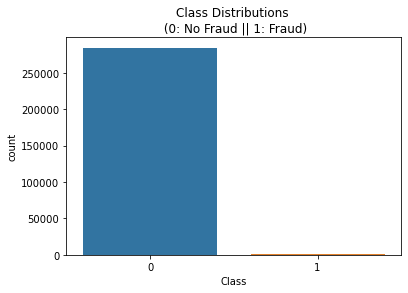

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cred_df = pd.read_csv(r'/kaggle/input/creditcardfraud/creditcard.csv')
sns.countplot('Class', data = cred_df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=12);

Như vậy dữ liệu ban đầu có sự thiên lệch đa số về class `0` nghĩa là số dữ liệu trong `class = 1` (số phiên giao dịch có gian lận) chiếm một lượng rất nhỏ.

Tiếp theo, ta sẽ phân tích tương quan giữa các đặc tính dữ liệu (`feature`) với `target (class)` bằng bản đồ nhiệt `heatmap`

Text(0.5, 1.0, 'Correlation Matrix')

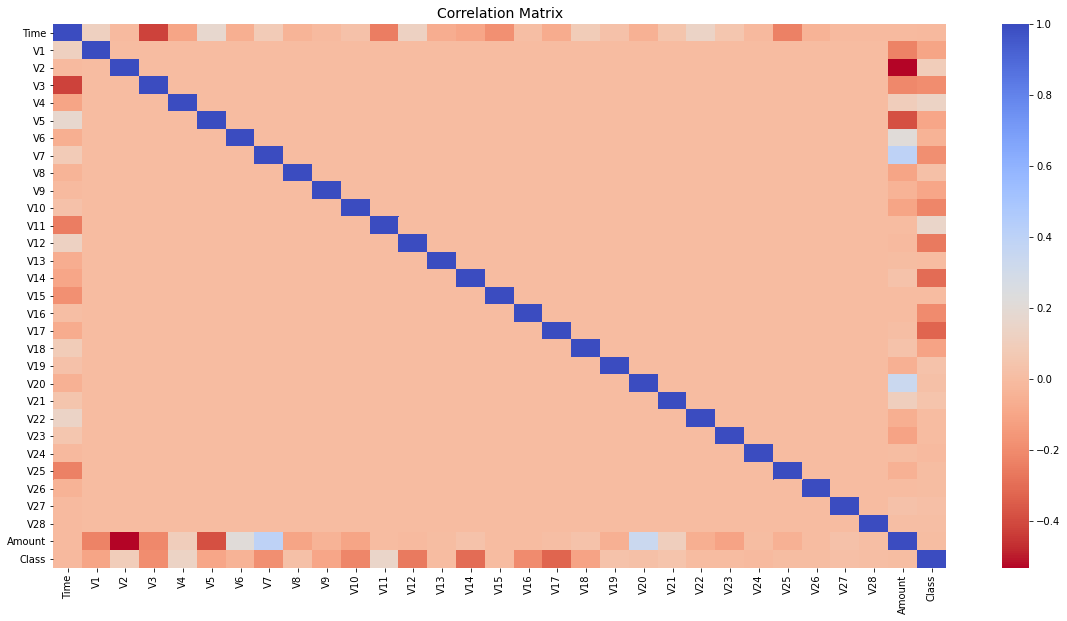

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
# Entire DataFrame
corr = cred_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)

Quan sát 30 đặc tính còn lại với giá trị trong cột `Y (class)`, ta thấy rằng chỉ có các cột `V3, V7, V10, V12, V14, V16, V17` là có tương quan đáng kể đến `Y`. Chú ý rằng ở đây ta chưa thực hiện các thao tác khác như `chuẩn hóa dữ liệu (normalization)` nên kết quả sau cùng trong bài toán này có thể chưa phải kết quả tối ưu.

**Bước 5. Build-in the model**

In [8]:
## Tách dữ liệu
X = cred_df.drop('Class', axis=1)
y = cred_df['Class']

## Phân chia dữ liệu thành 2 bộ train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=400, stratify = y)

## Lựa chọn mô hình
from sklearn.linear_model import LogisticRegression
log_reg_sm = LogisticRegression(max_iter = 300)

## Huấn luyện mô hình và tính toán giá trị dự đoán
log_reg_sm.fit(X_train, y_train)
y_pred_log_reg = log_reg_sm.predict(X_test)

## Đánh giá mô hình
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

[[85278    17]
 [   58    90]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.61      0.71       148

    accuracy                           1.00     85443
   macro avg       0.92      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



Vì hầu hết dữ liệu rơi vào `class = 0` nên việc đánh giá này có độ chính xác (`f1-accuracy`) xấp xỉ `1` nhưng thực tế ta nên chú ý vào `confusion matrix` của nó, theo đó:
- Ở phân lớp `class = 0` có `85278` trên tổng số `85295` dữ liệu dự đoán cho kết quả đúng (tỷ lệ gần như 100%); trong khi chỉ có `17` dữ liệu bị dự đoán sai và `17` giá trị dự đoán sai trong tổng số `85278` dữ liệu ở `class 0` cho ta cảm giác đây là mô hình đúng khi dự đoán phân lớp này.
- Ở `class = 1` chỉ có `148` quan trắc nhưng chỉ có `98` giá trị dự đoán đúng, đạt tỷ lệ chính xác là `71%` trong dự đoán.

Chú ý rằng bài toán ở đây đang là dự đoán `class = 1` nên việc kết quả dự đoán cho `class` này chỉ đạt `71%` vẫn là con số rất thấp, vì vậy để cải thiện độ chính xác của mô hình. Độc giả có thể xem thêm tại [đây: GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [16]:
from sklearn.model_selection import GridSearchCV

log_reg_params = {'C': [1, 10, 100], 'max_iter' : [300, 400, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

print(grid_log_reg.best_estimator_)

LogisticRegression(C=1, max_iter=400)


### Exercis 2. Regression model.
**Bước 1.** Thực hiện xử lý số liệu cơ bản cho data `AB_NYC_2019.csv`, [link](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)

In [31]:
AB_NYC_df = pd.read_csv(r'/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
AB_NYC_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Dữ liệu này chứa các thông tin về chỉ số hoạt động, chỉ số niêm yết, các giá trị định vị `kinh-vĩ độ` (`latitude` và `longititude`) ở `NewYork, 2019`, theo đó:
- `id`: mã định danh của danh mục sản phẩm.
- `name`: tên của danh mục (tính chất của phòng, nhà, căn hộ)
- `host_id`: mã định danh của khách hàng
- `host_name`: tên khách hàng
- `neighbourhood_group` và `neighboorhood`: vị trí, khu vực (giống như `"huyện - thành"` trong đơn vị của VN)
- `longitude` và `latitude`: tọa độ định vị, kinh độ và vĩ độ, số âm là tính bên trái kinh tuyến gốc.
- `room_type`: kiểu, loại phòng
- `price`: giá phòng
- `minimum_nights`: số đêm ở lại ít nhất khi đặt phòng
- `last_review`: lần truy cập gần nhất
- `reviews_per_month`: số lần truy cập hàng tháng
- `calculated_host_listings_count`: đếm theo danh mục mà khách hàng đã chọn
- `available_365`: số ngày có thể dùng trong 1 năm (tức là phòng còn trống bao nhiêu ngày trong năm)

In [32]:
AB_NYC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Xử lý loại bỏ dữ liệu khuyết**

Có gần `20%` dữ liệu sẽ bị mất đi nếu ta thực hiện `dataframe.dropna()` nên đây là phương án không khả thi.

Hơn nữa, ta thấy rằng các cột chứa dữ liệu khuyết ở đây như `last_review` và `reviews_per_month` chỉ ảnh hưởng đến khả năng khách hàng có đặt phòng hay không chứ chưa chắc có thể ảnh hưởng đến giá chi trả của 1 phòng (`price`), do đó, ta chỉ nên loại bỏ giá trị khuyết trong các cột này.

In [33]:
AB_NYC_df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
AB_NYC_df.shape

(48895, 12)

**Tiếp theo, loại bỏ các giá trị trùng lặp**.

In [34]:
AB_NYC_df.drop_duplicates(inplace = True)
AB_NYC_df.shape

(48895, 12)

Như vậy, so với bước trước đó, ta vẫn bảo toàn được dữ liệu, nghĩa là không có giá trị nào trùng lặp.

**Tiếp theo, loại bỏ giá trị ngoại lai.**

In [35]:
### Tìm IQR của dữ liệu
Q1 = AB_NYC_df.quantile(0.25)
Q3 = AB_NYC_df.quantile(0.75)
IQR = Q3 - Q1
## Loại bỏ outlier
outlier_condition = (AB_NYC_df < (Q1 - 1.5 * IQR)) | (AB_NYC_df > (Q3 + 1.5 * IQR))
AB_NYC_df = AB_NYC_df[~outlier_condition]
AB_NYC_df.shape

(48895, 12)

**EDA.**

Vì bài toán của chúng ta ở đây là bài toán về `hồi quy tuyến tính` (`Linear Regression` với `target` lúc này là `price` là một biến liên tục) chứ không phải `hồi quy logistic` (`Logistic Regression` với `target` dạng True/False) nên ta không cần phân tích `count plot` cho biến `target` mà thay vào đó, ta sẽ phân tích `count plot` cho các thuộc tính dạng `category` như `location (neigborhood)` tìm hiểu biểu đồ phân tán và bản đồ nhiệt trong đây.

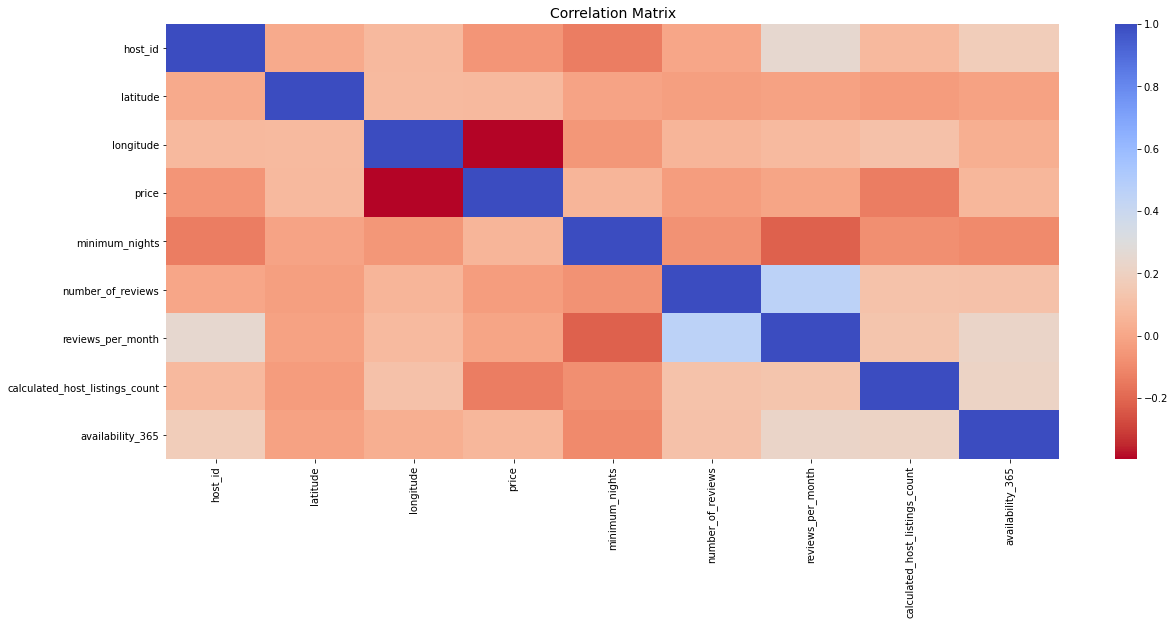

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 8))
corr = AB_NYC_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14);

Lúc này, độc giả hãy chú ý phân tích tương quan giữa các biến còn lại với `Price`, chỉ có các cột `neighbourhood_group, room_type, minimum_nights, calculated_host_listings_count` và `availability_365` là tương đối có ảnh hưởng.

Bây giờ, hãy chú ý đến dữ liệu trong `neighborhood_group`, `room_type`

Text(0.5, 1.0, 'Room type')

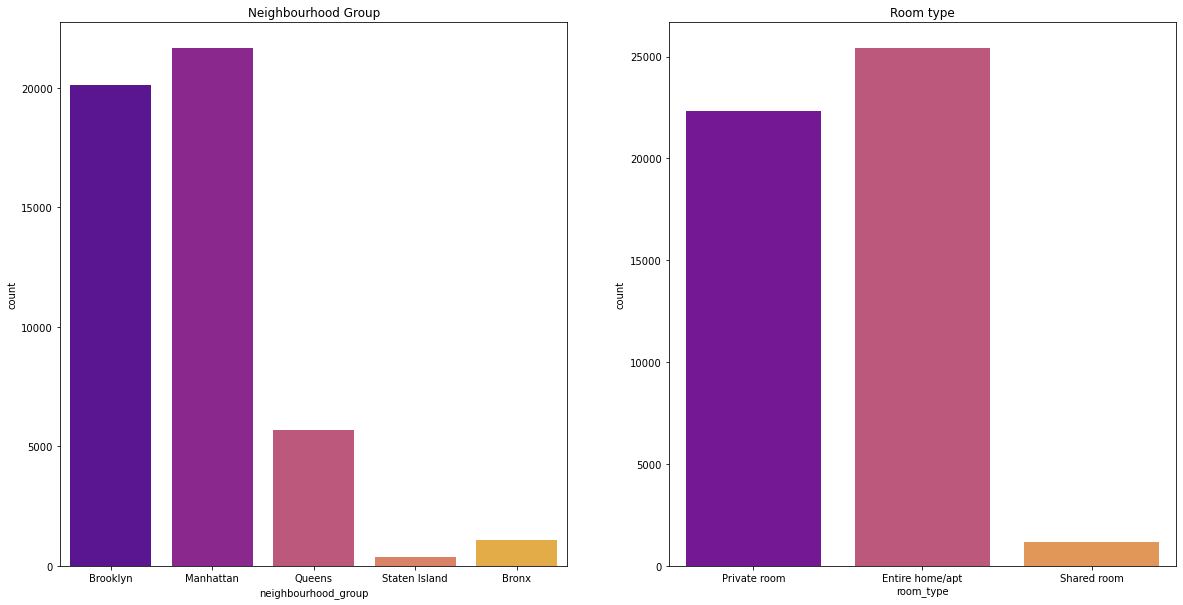

In [38]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))

sns.countplot(AB_NYC_df['neighbourhood_group'], palette="plasma", ax = ax[0])
ax[0].set_title('Neighbourhood Group')
sns.countplot(AB_NYC_df['room_type'], palette="plasma", ax = ax[1])
ax[1].set_title('Room type')

**Build-in the model**

In [45]:
AB_NYC_df = AB_NYC_df[['neighbourhood_group', 'room_type', 'price', 'minimum_nights', 'availability_365']]
AB_NYC_df.dropna(inplace = True)
X = AB_NYC_df.drop('price', axis = 1)
y = AB_NYC_df['price']

## encoding all the category-variables in dataframe
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

X_en = Encode(X.copy())

## Tách dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_en, y, test_size=0.3, random_state=40)

## Khai báo mô hình hồi quy tuyến tính
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)

## Trong hồi quy tuyến tính, tiêu chuẩn đánh giá độ khớp của mô hình là R2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.23648835528962675

Như vậy `r2_score = 0.236`, độ phù hợp khi thực hiện hồi quy tuyến tính vẫn còn khá tệ. Để tối ưu hơn, độc giả có thể thực hiện thử các mô hình khác như `DecissionTree`, `RandomForest`, `KNN`, 

### Exercise 3. Classification model.
**Bước 1.** Pre-processing for `FIFA 2018 Statistics.csv`, [link](https://www.kaggle.com/mathan/fifa-2018-match-statistics)

In [58]:
fifa_df = pd.read_csv(r'/kaggle/input/fifa-2018-match-statistics/FIFA 2018 Statistics.csv')
fifa_df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


Lần này, ta sẽ không nhắc lại và giải thích chi tiết như 2 bài trước nữa.

In [59]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [61]:
fifa_df = fifa_df.drop(['Own goals', 'Own goal Time', '1st Goal'], axis = 1)
fifa_df.shape

(128, 24)

In [62]:
fifa_df.drop_duplicates(inplace = True)
fifa_df.shape

(128, 24)

**EDA**

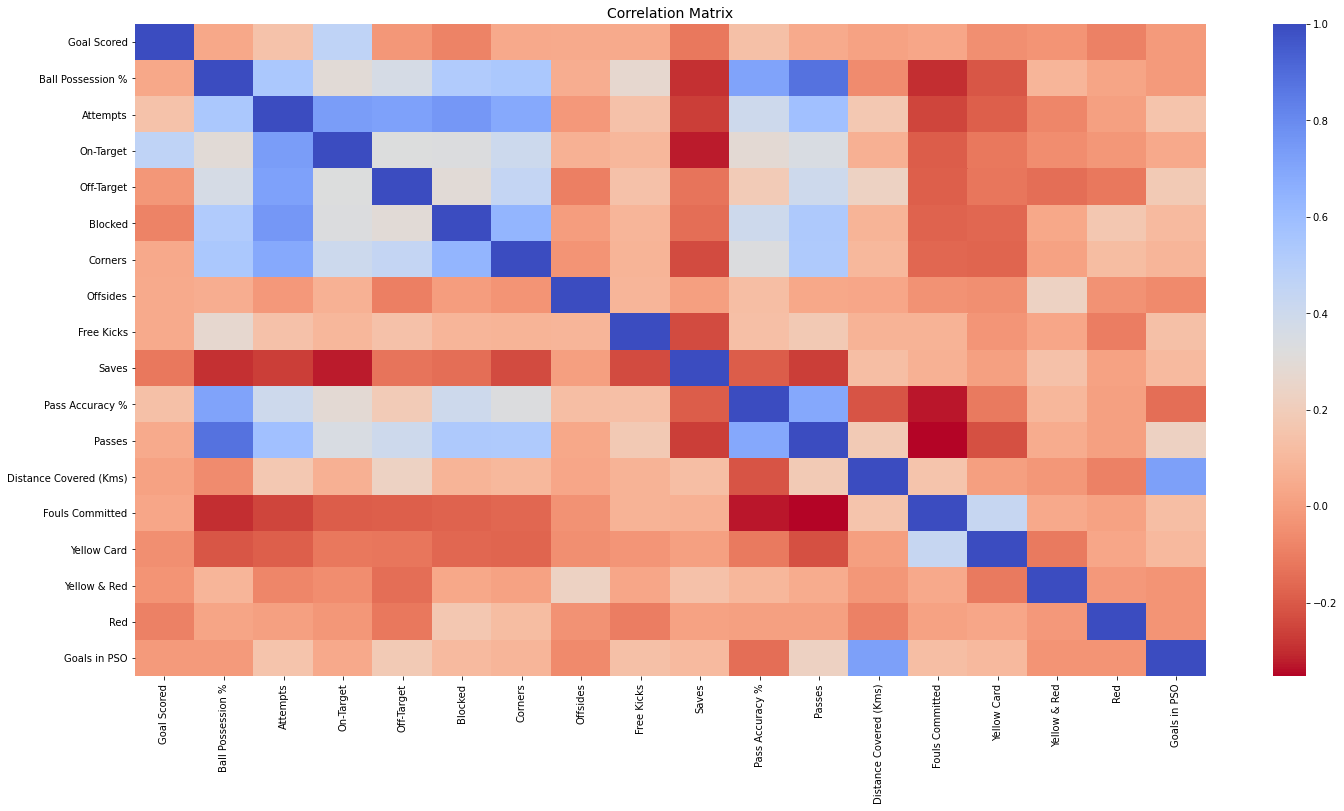

In [64]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 12))
corr = fifa_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14);

In [68]:
fifa_df.drop(['Date', 'Corners', 'Fouls Committed', 'On-Target'], axis = 1, inplace = True)
fifa_df.shape

(128, 20)

**Build-in model**

Xử lý các dữ liệu category

In [69]:
cleaned_data  = pd.get_dummies(fifa_df)
cleaned_data.shape

(128, 89)

Chuyển hóa Encoder

In [70]:
from sklearn.preprocessing import LabelEncoder
fifa_df = fifa_df.apply(LabelEncoder().fit_transform)
fifa_df.head()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,Off-Target,Blocked,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Yellow Card,Yellow & Red,Red,Man of the Match,Round,PSO,Goals in PSO
0,23,24,5,11,10,2,3,3,5,0,8,15,26,0,0,0,1,2,0,0
1,24,23,0,31,3,2,3,1,19,2,16,68,15,0,0,0,0,2,0,0
2,8,31,0,14,5,2,2,1,2,3,8,40,22,2,0,0,0,2,0,0
3,31,8,1,28,11,5,4,1,7,3,16,86,21,0,0,0,1,2,0,0
4,17,13,0,35,10,5,4,0,8,2,16,49,11,1,0,0,0,2,0,0


Tách dữ liệu

In [73]:
X = fifa_df.drop(['Man of the Match'], axis = 1)
y = fifa_df['Man of the Match']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Huấn luyện và dự đoán

In [85]:
from sklearn.linear_model import LogisticRegression

logis = LogisticRegression(max_iter = 800)
logis.fit(X_train, y_train)
logis_score_train = logis.score(X_train, y_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(X_test, y_test)
print("Testing score: ", logis_score_test)

Training score:  0.81
Testing score:  0.85
